In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from scipy.fft import fft, fftfreq

# **Load Data Voice**
Mengeksplorasi transformasi sinyal dari domain waktu ke domain frekuensi menggunakan FFT (Fast Fourier Transform), dan kembali ke domain waktu dengan IFFT (Inverse FFT), untuk memahami bagaimana sinyal audio disusun dari komponen frekuensi.

In [67]:
samplerate, data = wavfile.read('/kaggle/input/suara-ombak/07056007.wav') 
data = data[:samplerate * 5 ]

/tmp/ipykernel_35/4068569559.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('/kaggle/input/suara-ombak/07056007.wav')


Tujuan:
Membaca file suara berformat .wav agar bisa diproses dalam bentuk array numerik.

Cara kerja:
* samplerate menyimpan jumlah sampel per detik (Hz).
* data adalah array amplitudo sinyal audio.

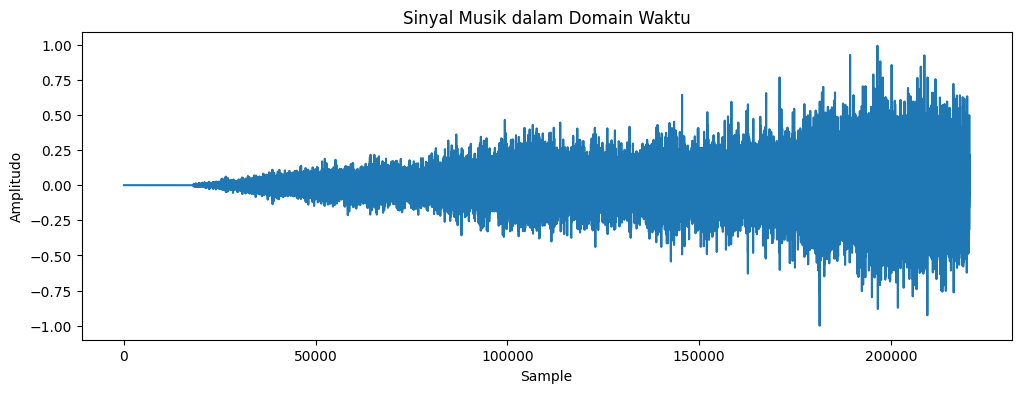

In [68]:
if data.ndim > 1:
    data = data[:, 0]
data = data / np.max(np.abs(data))

plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Sinyal Musik dalam Domain Waktu')
plt.xlabel('Sample')
plt.ylabel('Amplitudo')
plt.show()

Tujuan:
* Menangani file stereo dengan hanya mengambil satu channel audio (biasanya kiri).
* Menghindari clipping dan menjaga sinyal dalam rentang -1 sampai 1.

Cara kerja:
* Audio stereo punya dua kolom (data[:, 0] dan data[:, 1]).
* Semua nilai dibagi dengan nilai absolut tertinggi dari sinyal.

Hitung Spektrum Frekuensi (FFT)

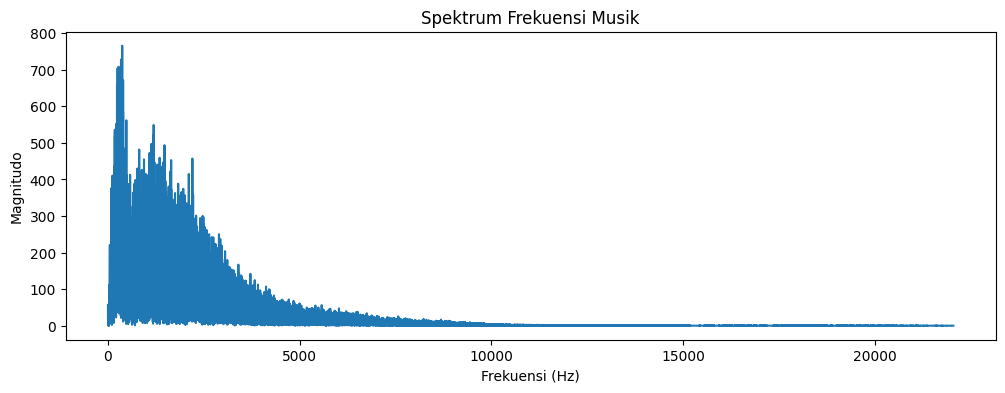

In [69]:
N = len(data)
T = 1 / samplerate
frequencies = fftfreq(N, T)
spectrum = fft(data)

half_N = N // 2
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:half_N], np.abs(spectrum[:half_N]))
plt.title('Spektrum Frekuensi Musik')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo')
plt.show()

Tujuan:
Menguraikan sinyal menjadi frekuensi-frekuensi penyusunnya.

Cara kerja:
* fft(data) menghasilkan bilangan kompleks (magnitudo + fase).
* fftfreq() menghasilkan daftar frekuensi yang sesuai dengan setiap indeks spektrum.

# **Identifikasi Frekuensi Dominan**

In [70]:
dominant_freq_idx = np.argmax(np.abs(spectrum[:half_N]))
dominant_freq = frequencies[dominant_freq_idx]
print(f'Frekuensi dominan: {dominant_freq:.2f} Hz')

Frekuensi dominan: 372.40 Hz


# **Transformasi Kembali ke Domain Waktu (IFFT)**

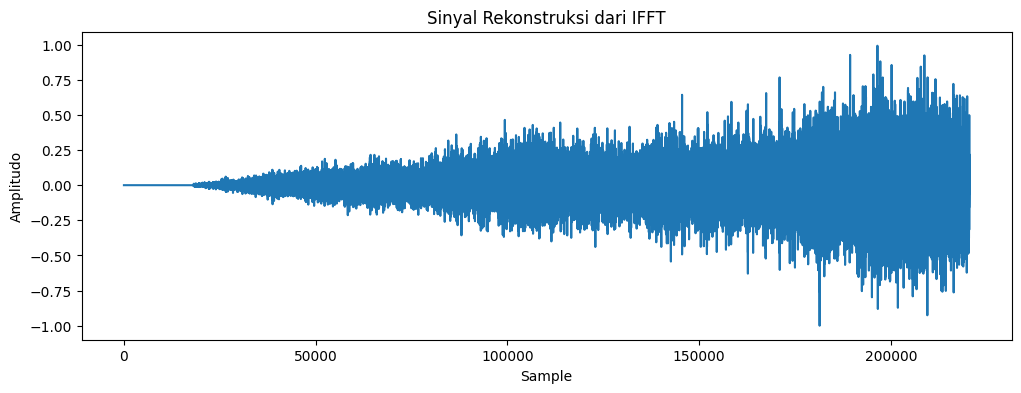

In [71]:
reconstructed_signal = ifft(spectrum).real

# Visualisasi hasil rekonstruksi
plt.figure(figsize=(12, 4))
plt.plot(reconstructed_signal)
plt.title('Sinyal Rekonstruksi dari IFFT')
plt.xlabel('Sample')
plt.ylabel('Amplitudo')
plt.show()

# **Bandingkan Sinyal Asli dan Rekonstruksi**

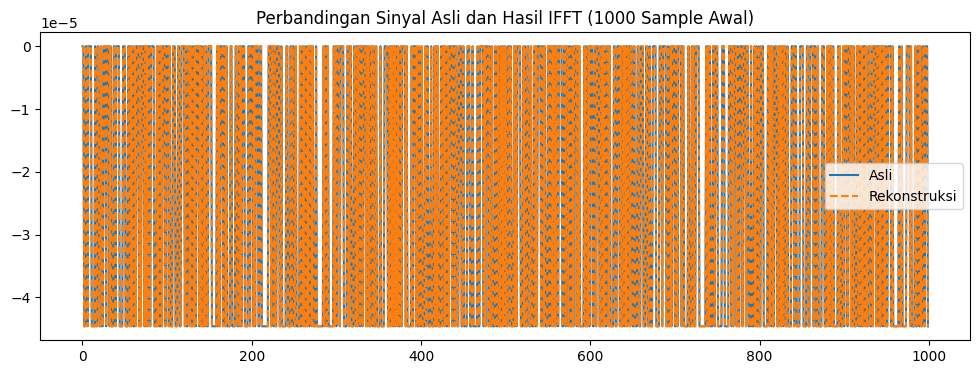

In [72]:
plt.figure(figsize=(12, 4))
plt.plot(data[:1000], label='Asli')
plt.plot(reconstructed_signal[:1000], label='Rekonstruksi', linestyle='dashed')
plt.title('Perbandingan Sinyal Asli dan Hasil IFFT (1000 Sample Awal)')
plt.legend()
plt.show()

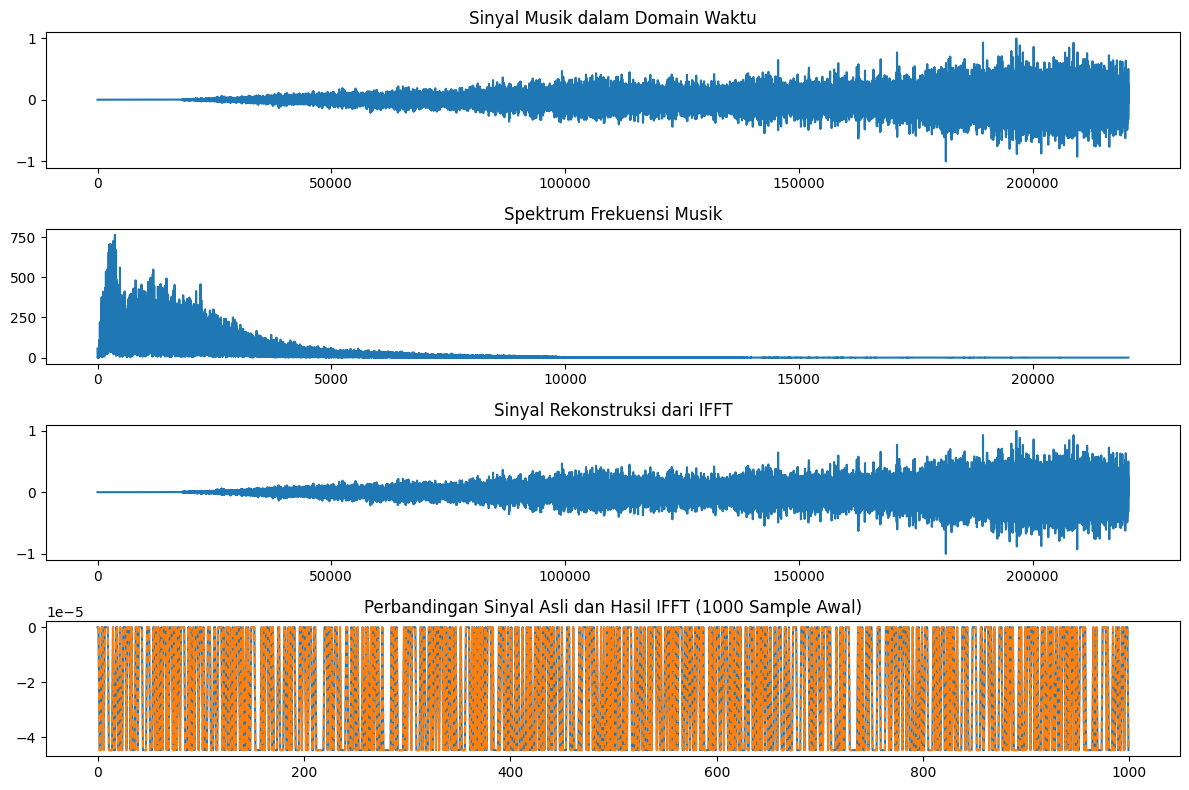

In [73]:

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Musik dalam Domain Waktu')

plt.subplot(4, 1, 2)
plt.plot(frequencies[:half_N], np.abs(spectrum[:half_N]))
plt.title('Spektrum Frekuensi Musik')

plt.subplot(4, 1, 3)
plt.plot(reconstructed_signal)
plt.title('Sinyal Rekonstruksi dari IFFT')

plt.subplot(4, 1, 4)
plt.plot(data[:1000], label='Asli')
plt.plot(reconstructed_signal[:1000], label='Rekonstruksi', linestyle='dashed')
plt.title('Perbandingan Sinyal Asli dan Hasil IFFT (1000 Sample Awal)')

plt.tight_layout()
plt.show()

Analisis:

1. Spektrum frekuensi menunjukkan komponen dominan dari suara musik.
2. Frekuensi dominan dapat berkaitan dengan pitch utama pada musik tersebut.
3. Transformasi IFFT berhasil merekonstruksi sinyal musik dengan akurasi tinggi.

Refleksi Pribadi:

1. Eksperimen ini membuka wawasan tentang hubungan antara domain frekuensi dan waktu.
2. FFT sangat berguna dalam menganalisis struktur suara.
3. Saya menyadari pentingnya normalisasi dan teknik pemrosesan sebelum analisis.
4. Transformasi Fourier tidak hanya teori, tapi memiliki penerapan nyata seperti pengenalan suara dan musik.